# Quantum Energy Solver

1 Dimension에 대해 Finite differnce scheme으로 basis를 구성 하고, 그 위에서 최종 inhomogeneous K dot P 계산 까지

우선, 필요한 모듈을 불러오기 (import)

numpy : 수학 및 array 관련 모듈

matplotlib : 그래프 그리는 모듈

scipy : 다양한 과학에 응용되는 수학 모듈

scipy.sparse : scipy 중 sparse matrix에 관련된 모듈

In [1]:
%matplotlib inline  
import numpy as np      ### 수학 모듈 (numpy)를 불러와 np로 호출
import matplotlib.pyplot as plt   ### 그래프 그리는 모듈 matplot.pyplot을 불러와 plt로 호출
from scipy.sparse import csr_matrix, eye, diags, spdiags  ### sparse matrix  메모리 줄임
from scipy.sparse.linalg import eigs, spsolve

<img src = 'https://www.computerhope.com/jargon/s/sparse-matrix-example.jpg'>

### Parameter 정의

In [2]:
boundary = 'Dirichlet'  # or 'Neumann'
hbar = 6.626e-34/2/np.pi
e = 1.6e-19
eo = 8.85e-12
er = 9
emass = 9.1e-31
me = 0.13   # CdSe me=0.13 mh=0.45       # CdS me:0.21 mh:0.8
mh = 0.45   # CdTe me=0.1  mh=0.4
Ep=20                     # CdS: me.18 mh0.6 Eg2.45       VBO=0.52    qX=4.79 er=8.6

In [3]:
np.pi

3.141592653589793

### Define geometry (mesh)에 따른 각 parameter 입력

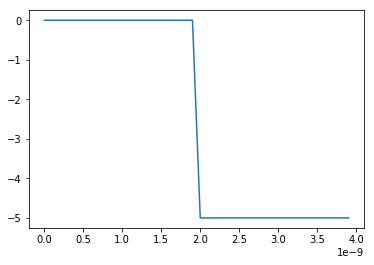

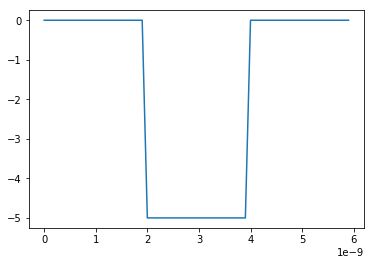

In [4]:
spacing = 1e-10   # mesh size
CB = np.append(np.zeros(20), np.ones(20)*-5)   # np.zeros(숫자))  : 숫자갯수만큼의 array 생성
plt.plot(np.arange(len(CB))*spacing, CB)   # arange(처음 수, 끝 수, 스텝)

# 새로운 그림 
CB = np.append(CB, np.zeros(20))     # append : 2개의 array들을 이음
plt.figure()                         # 새 그림 그릴때 필요
X = np.arange(0, len(CB)*spacing, spacing)   # X 축 정의
n = X.size                           # n은 전체 mesh 갯수가 됨
plt.plot(np.arange(len(CB))*spacing, CB)   # plt.plot(x축, y축)


In [5]:
n

60

## Solve Schrodinger Equation

$$ \biggl(-\frac{\nabla^2}{2m} + V\biggr)\psi = E\psi $$

### Kinetic energy

$$ \biggl(-\frac{\nabla^2}{2m} \biggr) $$

matrix([[ 58.7541299 , -29.37706495,   0.        ,   0.        ,
           0.        ],
        [-29.37706495,  58.7541299 , -29.37706495,   0.        ,
           0.        ],
        [  0.        , -29.37706495,  58.7541299 , -29.37706495,
           0.        ],
        [  0.        ,   0.        , -29.37706495,  58.7541299 ,
         -29.37706495],
        [  0.        ,   0.        ,   0.        , -29.37706495,
          58.7541299 ]])

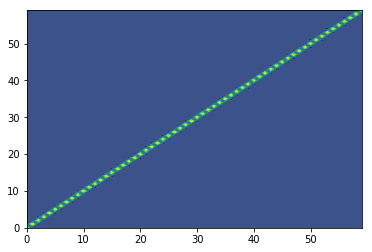

In [6]:
laplace = eye(n)*(-2) + eye(n,k=1) + eye(n, k=-1)   # eye : unitary matrix
if boundary == 'Neumann':
    laplace[-1,-2] *= 2                               # numpy index 공부할것 
    laplace[0,1] *= 2
laplace *= (-0.5 * (hbar**2)) 
laplace /= (me*emass*e*spacing**2)
plt.contourf(laplace.todense())
laplace.todense()[:5,:5]              # .todense() sparse matrix를 dense matrix로 변환, 여기서는 결과 확인용

In [7]:
laplace.todense()

matrix([[ 58.7541299 , -29.37706495,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [-29.37706495,  58.7541299 , -29.37706495, ...,   0.        ,
           0.        ,   0.        ],
        [  0.        , -29.37706495,  58.7541299 , ...,   0.        ,
           0.        ,   0.        ],
        ...,
        [  0.        ,   0.        ,   0.        , ...,  58.7541299 ,
         -29.37706495,   0.        ],
        [  0.        ,   0.        ,   0.        , ..., -29.37706495,
          58.7541299 , -29.37706495],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
         -29.37706495,  58.7541299 ]])

### Potential energy (V)

In [8]:
V = diags(CB)     # CB의 array를 diagonal 성분으로 갖는 sparse matrix 생성
V.todense()[15:25, 15:25]

matrix([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., -5.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., -5.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -5.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -5.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -5.]])

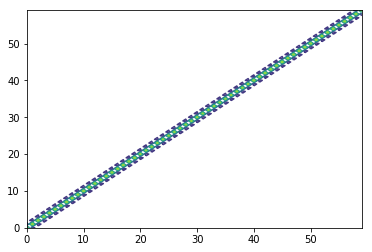

In [9]:
Hamiltonian = csr_matrix(laplace + V)   # sparse matrix 한 종류
plt.contour(Hamiltonian.todense())

### Solve Hamiltonian

[-4.53744584+0.j -3.19309932+0.j -1.16010052+0.j  0.4441387 +0.j
  0.72958198+0.j]
[1.34434652+0.j 2.0329988 +0.j 1.60423922+0.j 0.28544328+0.j]


C:\anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


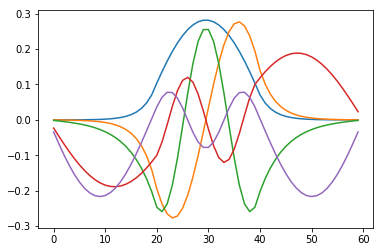

In [10]:
eev, eef= eigs(Hamiltonian, 5, sigma = -5, which='LM')  
# Linear algebra solution, 5개 해를, -5 근처에서, 'LM' : least magnitude 순으로
plt.plot(eef)
print (eev)
print (np.diff(eev))

### Normalization of wavefunction

In [11]:
print (np.sum(eef[:,0]*np.conjugate(eef[:,0]))*spacing)

(9.999999999999996e-11+0j)


It's not normalized~!!

Let's normalize so that 

$$ \int \phi\phi^* dz = 1 $$

for this

$$ \phi = \frac{\phi}  {(\sqrt{\int \phi\phi^* })}$$

In [12]:
def normalization(wf):
    norm = np.sqrt(np.sum(wf*np.conjugate(wf))*spacing)
    wf /= norm
    return wf

**코딩 함수 (def)**

def 함수 이름 (입력값):
    
    함수 내용
    
    return 출력값
    
*함수 밖에서 정의한 변수는 함수안에서 사용가능하나

함수 안에서 정의한 변수는 함수 밖에서 호출 불가능

자세한 내용 https://wikidocs.net/book/1 참조

In [13]:
e_norm = normalization(eef[:,0])
print (np.sum(e_norm*np.conjugate(e_norm))*spacing)

(1.0000000000000002+0j)


Now, it's normalized

# Simple Harmonic Oscillator

Equal energy differences between energies

In [14]:
X

array([0.0e+00, 1.0e-10, 2.0e-10, 3.0e-10, 4.0e-10, 5.0e-10, 6.0e-10,
       7.0e-10, 8.0e-10, 9.0e-10, 1.0e-09, 1.1e-09, 1.2e-09, 1.3e-09,
       1.4e-09, 1.5e-09, 1.6e-09, 1.7e-09, 1.8e-09, 1.9e-09, 2.0e-09,
       2.1e-09, 2.2e-09, 2.3e-09, 2.4e-09, 2.5e-09, 2.6e-09, 2.7e-09,
       2.8e-09, 2.9e-09, 3.0e-09, 3.1e-09, 3.2e-09, 3.3e-09, 3.4e-09,
       3.5e-09, 3.6e-09, 3.7e-09, 3.8e-09, 3.9e-09, 4.0e-09, 4.1e-09,
       4.2e-09, 4.3e-09, 4.4e-09, 4.5e-09, 4.6e-09, 4.7e-09, 4.8e-09,
       4.9e-09, 5.0e-09, 5.1e-09, 5.2e-09, 5.3e-09, 5.4e-09, 5.5e-09,
       5.6e-09, 5.7e-09, 5.8e-09, 5.9e-09])

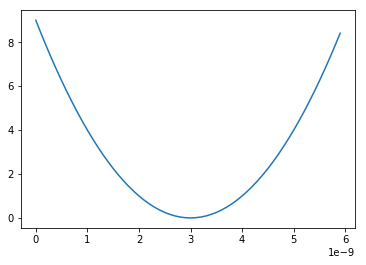

In [15]:
CB = 1e18*(X-3e-9)**2
plt.plot(X, CB)

[0.54138063+0.j 1.62289345+0.j 2.70197366+0.j 3.77917223+0.j
 4.85724381+0.j]
[1.08151282+0.j 1.07908022+0.j 1.07719857+0.j 1.07807158+0.j]


C:\anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:295: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


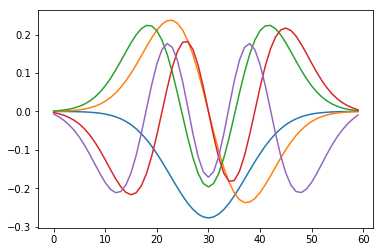

In [16]:
V = diags(CB)
Hamiltonian = csr_matrix(laplace + V)
eev, eef= eigs(Hamiltonian, 5, sigma = 0, which='LM')
plt.plot(eef)
print (eev)
print (np.diff(eev))

## Mimic of Hydrogen atom

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


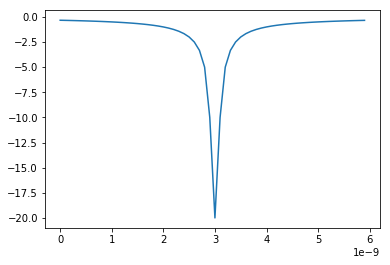

In [17]:
CB = -1e-9*(1/np.abs((X-3e-9)))
CB[30] = -20   # to prevent the divergence
plt.plot(X, CB)

[-8.20524828+0.j -0.84023006+0.j -0.41389935+0.j  0.1848164 +0.j
  0.6231463 +0.j]
[7.36501822+0.j 0.42633071+0.j 0.59871575+0.j 0.4383299 +0.j]


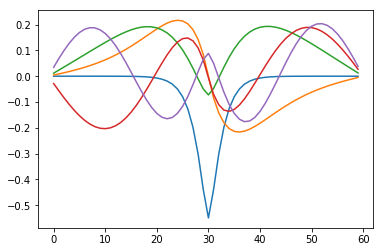

In [18]:
V = diags(CB)
Hamiltonian = csr_matrix(laplace + V)
eev, eef= eigs(Hamiltonian, 5, sigma = -40, which='LM')
plt.plot(eef)
print (eev)
print (np.diff(eev))

### Let's change the boundary condition

[-8.20524828+0.j -0.85123072+0.j -0.50509639+0.j -0.19808648+0.j
  0.09283391+0.j]
[7.35401755+0.j 0.34613433+0.j 0.30700991+0.j 0.29092038+0.j]


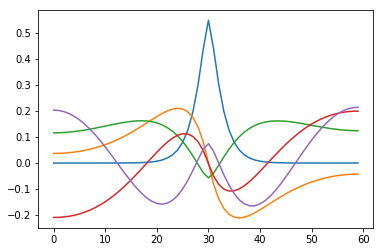

In [19]:
boundary = 'Neumann'
laplace = eye(n)*(-2) + eye(n,k=1) + eye(n, k=-1)   # eye : unitary matrix
if boundary == 'Neumann':
    laplace[-1,-2] *= 2                               # numpy index 공부할것 
    laplace[0,1] *= 2
laplace *= (-0.5 * (hbar**2)) 
laplace /= (me*emass*e*spacing**2)

Hamiltonian = csr_matrix(laplace + V)
eev, eef= eigs(Hamiltonian, 5, sigma = -40, which='LM')
plt.plot(eef)
print (eev)
print (np.diff(eev))

## Asymmetric well for Type-II QDs

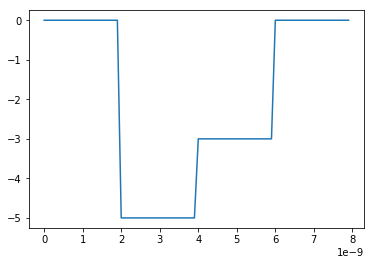

In [20]:
spacing = 1e-10
CB = np.append(np.zeros(20), np.ones(20)*-5)   # np.zeros(숫자))  : 숫자갯수만큼의 array 생성
CB = np.append(CB, np.ones(20)*-3)     # append : 2개의 array들을 이음
CB = np.append(CB, np.zeros(20))
X = np.arange(0, len(CB)*spacing, spacing)   # X 축 정의
n = X.size                           # n은 전체 mesh 갯수가 됨
plt.plot(np.arange(len(CB))*spacing, CB)   # plt.plot(x축, y축)


[-4.58794018+0.j]


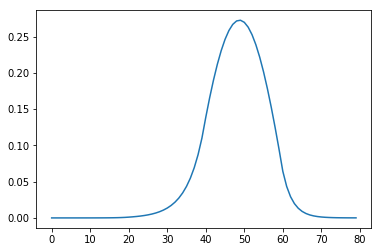

In [21]:
laplace = eye(n)*(-2) +eye(n,k=1) +eye(n, k=-1)   # eye : unitary matrix
laplace[-1,-2] *= 2                               # numpy index 공부할것 
laplace[0,1] *= 2
laplace *= (-0.5 * (hbar**2)) 
laplace /= (me*emass*e*spacing**2)
V = diags(CB[::-1])     # CB의 array를 diagonal 성분으로 갖는 sparse matrix 생성
Hamiltonian = csr_matrix(laplace + V)
eev, eef= eigs(Hamiltonian, 1, sigma = -5, which='LM')
plt.plot(eef)
print (eev)

## K dot P

And calculate both electron and hole simultaneously

$$\begin{pmatrix} electron & KP \\\ KP & hole \end{pmatrix}$$

$$ KP =\frac{\hbar}{m} K \cdot p $$

momentum operator $ p = -i\hbar \nabla $


In [22]:
me = 0.13
mh = 0.45

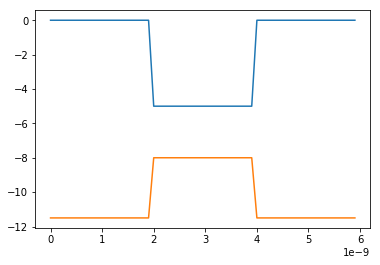

In [23]:
spacing = 1e-10
Eg = 1.5
CB = np.append(np.zeros(20), np.ones(20)*-5)   # np.zeros(숫자))  : 숫자갯수만큼의 array 생성
CB = np.append(CB, np.zeros(20))     # append : 2개의 array들을 이음
X = np.arange(0, len(CB)*spacing, spacing)   # X 축 정의
n = X.size                           # n은 전체 mesh 갯수가 됨

VB = np.append(np.ones(20)*10, np.ones(20)*6.5)   # np.zeros(숫자))  : 숫자갯수만큼의 array 생성
VB = np.append(VB, np.ones(20)*10)     # append : 2개의 array들을 이음

plt.plot(np.arange(len(CB))*spacing, CB)   # plt.plot(x축, y축)
plt.plot(np.arange(len(CB))*spacing, -Eg-VB)
CB = diags(CB)
VB = diags(VB)

In [24]:
def laplace(n, coefficient, boundary = 'Dirichlet', Coulomb = False):
    mat = eye(n)*(-2) +eye(n,k=1) +eye(n, k=-1)   # eye : unitary matrix
    if boundary == 'Neumann':
        mat[-1,-2] *= 2                               # numpy index 공부할것 
        mat[0,1] *= 2
    if Coulomb == False:
        mat *= (-0.5 * (hbar**2)) 
        mat /= (coefficient*emass*e)
    else:
        mat *= (coefficient)
    mat /= (spacing**2)
    return mat

In [25]:
laplaceCB = laplace(n, me, )
laplaceVB = laplace(n, mh, )

In [26]:
off_diagonal = eye(n, k = 1) + eye(n, k = -1)* -1
off_diagonal = off_diagonal * (-1j*hbar*np.sqrt(Ep/2)) / spacing

In [27]:
kp = np.zeros((2*n, 2*n), dtype = complex)
kp[:n, :n] = (laplaceCB + CB).todense()
kp[n:2*n, n: 2*n] = -1*(laplaceVB + VB).todense()
kp[:n, n:2*n] = off_diagonal.todense()
kp[n:2*n, :n] = off_diagonal.todense()
kp = csr_matrix(kp)

In [28]:
eev, eef= eigs(kp, 1, sigma = -5, which='LM')
hev, hef= eigs(kp, 1, sigma = -6.5 , which='LM')

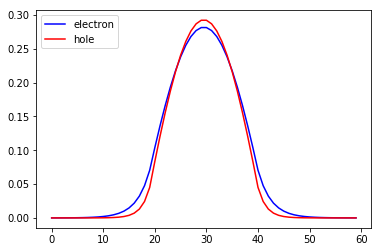

In [29]:
plt.plot(np.abs(eef[:n]), color = 'blue', label = 'electron')
plt.plot(np.abs(hef[n:]), color = 'red', label = 'hole')
plt.legend(loc = 2)

## Type-II QD with K dot P

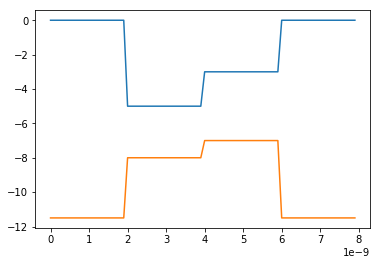

In [30]:
spacing = 1e-10
Eg = 1.5
CB = np.append(np.zeros(20), np.ones(20)*-5)   # np.zeros(숫자))  : 숫자갯수만큼의 array 생성
CB = np.append(CB, np.ones(20)*-3)     # append : 2개의 array들을 이음
CB = np.append(CB, np.zeros(20))
X = np.arange(0, len(CB)*spacing, spacing)   # X 축 정의
n = X.size                           # n은 전체 mesh 갯수가 됨

VB = np.append(np.ones(20)*10, np.ones(20)*6.5)   # np.zeros(숫자))  : 숫자갯수만큼의 array 생성
VB = np.append(VB, np.ones(20)*5.5)     # append : 2개의 array들을 이음
VB = np.append(VB, np.ones(20)*10)
plt.plot(np.arange(len(CB))*spacing, CB)   # plt.plot(x축, y축)
plt.plot(np.arange(len(CB))*spacing, -Eg-VB)

CB = diags(CB)
VB = diags(VB)

Don't want to repeat the same code again, so let's make Function (def) 

In [31]:
def off_diagonal_matrix(n):
    off_diagonal = eye(n, k = 1) - eye(n, k = -1)* -1
    off_diagonal = off_diagonal * (-1j*hbar*np.sqrt(Ep/2)) / spacing
    return off_diagonal

def kp_matrix(mat1, mat2, mat_off):
    kp = np.zeros((2*n, 2*n), dtype = complex)
    kp[:n, :n] = (mat1 + CB).todense()
    kp[n:2*n, n: 2*n] = -1*(mat2 + VB).todense()
    kp[:n, n:2*n] = mat_off.todense()
    kp[n:2*n, :n] = mat_off.todense()
    kp = csr_matrix(kp)
    return kp

In [32]:
me = 0.13; mh = 0.45
laplaceCB = laplace(n, me) 
laplaceVB = laplace(n, mh)
off_diagonal = off_diagonal_matrix(n)

In [33]:
kp = kp_matrix(laplaceCB, laplaceVB, off_diagonal)

Text(0.5, 1.0, 'Wavefunctions')

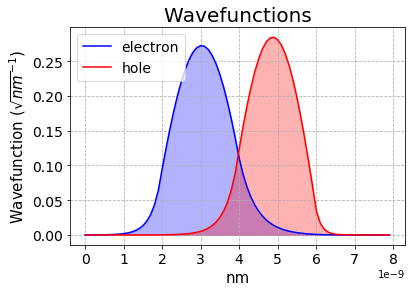

In [34]:
eev, eef= eigs(kp, 1, sigma = -5, which='LM')
hev, hef= eigs(kp, 1, sigma = -5.5 , which='LM')

plt.plot(X, np.abs(eef[:n]), 'b', label = 'electron')
plt.plot(X, np.abs(hef[n:]), 'r', label = 'hole')
plt.fill_between(X, 0, np.abs(eef[:n])[:,0], alpha = 0.3, color = 'b')
plt.fill_between(X, 0, np.abs(hef[n:])[:,0], alpha = 0.3, color = 'r')
plt.legend(fontsize = 14, loc = 2)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('nm', fontsize = 15)
plt.ylabel('Wavefunction ($\sqrt{nm}^{-1}$)', fontsize = 15)
plt.grid(linestyle = '--')
plt.title('Wavefunctions', fontsize = 20)

In [35]:
eef_norm = normalization(eef[:n,0])
hef_norm = normalization(hef[n:,0])
overlap_integral = np.abs(np.sum(np.multiply(eef_norm, np.conjugate(hef_norm))*spacing))
print ('Overlap integral : {:.3f}'.format(overlap_integral))

Overlap integral : 0.167


## Poisson equation

In [36]:
def laplace(n, coefficient, boundary = 'Dirichlet', Coulomb = False):
    mat = eye(n)*(-2) +eye(n,k=1) +eye(n, k=-1)   # eye : unitary matrix
    if boundary == 'Neumann':
        mat[-1,-2] *= 2                               # numpy index 공부할것 
        mat[0,1] *= 2
    if Coulomb == False:
        mat *= (-0.5 * (hbar**2)) 
        mat /= (coefficient*emass*e)
    elif Coulomb == True:
        mat *= coefficient
    mat /= (spacing**2)
    return mat

In [46]:
eef_square = np.abs(eef_norm)**2
hef_square = np.abs(hef_norm)**2
er1 = 9
boundary = 'Dirichlet'
laplace_coulomb = laplace(n, 1, boundary, Coulomb = 'True')
vce = spsolve(laplace_coulomb, eef_square*e/eo)
vch = spsolve(laplace_coulomb, hef_square*e/eo)

In [45]:
eo

8.85e-12

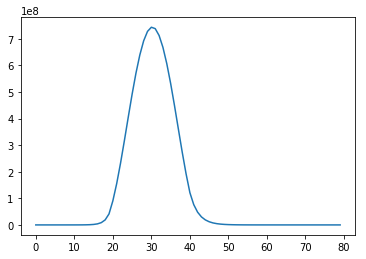

In [39]:
plt.plot(eef_square)

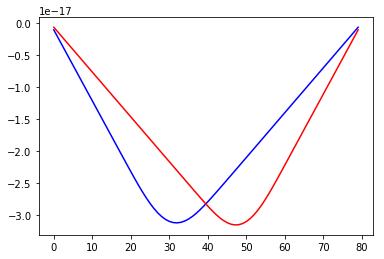

In [47]:
plt.plot(vce, 'b')
plt.plot(vch, 'r')

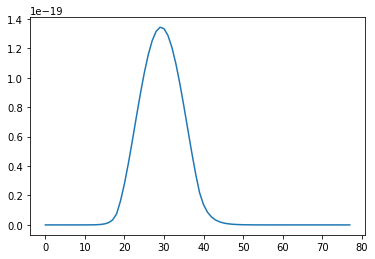

In [48]:
plt.plot(np.diff(np.diff(vce)))

In [49]:
np.sum(np.diff(np.diff(vce))/spacing**2)/e*eo*spacing

0.999999999595819

## Inhomogeneous medium

In [ ]:
spacing = 1e-10
Eg = 1.5
CB = np.append(np.zeros(120), np.ones(20)*-5)   # np.zeros(숫자))  : 숫자갯수만큼의 array 생성
CB = np.append(CB, np.ones(20)*-3)     # append : 2개의 array들을 이음
CB = np.append(CB, np.zeros(120))
X = np.arange(0, len(CB)*spacing, spacing)   # X 축 정의
n = X.size                           # n은 전체 mesh 갯수가 됨

VB = np.append(np.ones(120)*10, np.ones(20)*6.5)   # np.zeros(숫자))  : 숫자갯수만큼의 array 생성
VB = np.append(VB, np.ones(20)*5.5)     # append : 2개의 array들을 이음
VB = np.append(VB, np.ones(120)*10)
plt.plot(np.arange(len(CB))*spacing, CB)   # plt.plot(x축, y축)
plt.plot(np.arange(len(CB))*spacing, -Eg-VB)

In [ ]:
CB = diags(CB)
VB = diags(VB)

In [ ]:
me1 = 0.13   # CdSe me=0.13 mh=0.45       # CdS me:0.21 mh:0.8
mh1 = 0.45   # CdTe me=0.1  mh=0.4
me2 = 0.16
mh2 = 0.57
er1 = 9
er2 = 10
me = np.ones(280, dtype = float)*0.1
mh = np.ones(280, dtype = float)*0.4
er = np.ones(280, dtype = float)*1
me[120:140] = me1
me[140:160] = me2
mh[120:140] = mh1
mh[140:160] = mh2
er[120:140] = er1
er[140:160] = er1
er[120:140] = er1
er[140:160] = er1

In [ ]:
def inhomo_laplace(n, coeff, boundary = 'Dirichlet', Coulomb = False):
    mat = -(eye(n)*diags((np.roll(coeff,1)+np.roll(coeff,-1)))) + eye(n, k = 1)*diags(np.roll(coeff, -1)) \
    + eye(n, k = -1)*diags(np.roll(coeff, 1))
    
    if boundary == 'Neumann':
        mat[-1,-2] *= 2                               # numpy index 공부할것 
        mat[0,1] *= 2
    if Coulomb == False:
        mat *= (-0.5 * (hbar**2)) 
        mat /= (emass*e)  
    
    mat /= (spacing**2)
    mat = csr_matrix(mat)
    return mat

In [ ]:
laplaceCB = inhomo_laplace(n, me)
laplaceVB = inhomo_laplace(n, mh)

In [ ]:
off_diagonal = off_diagonal_matrix(n)
kp = kp_matrix(laplaceCB, laplaceVB, off_diagonal)

In [ ]:
eev, eef= eigs(kp, 1, sigma = -5, which='LM')
hev, hef= eigs(kp, 1, sigma = -5.5 , which='LM')

In [ ]:
plt.plot(np.abs(eef[:n]))
plt.plot(np.abs(hef[n:]))

In [ ]:
eef_norm = normalization(eef[:n,0])
hef_norm = normalization(hef[n:,0])
overlap_integral = np.abs(np.sum(np.multiply(eef_norm, np.conjugate(hef_norm))*spacing))
print ('Overlap integral : {:.3f}'.format(overlap_integral))

In [ ]:
eef_square = np.abs(eef_norm)**2
hef_square = np.abs(hef_norm)**2
er1 = 9
boundary = 'Dirichlet'
laplace_coulomb = laplace(n, er1, boundary, Coulomb = 'True')

vce = spsolve(laplace_coulomb, eef_square*e/eo)
vch = spsolve(laplace_coulomb, hef_square*e/eo)

In [ ]:
plt.plot(vce, 'b')
plt.plot(vch, 'r')

## Self-consistent iteration

In [ ]:
eev, eef= eigs(kp, 1, sigma = -5, which='LM')
hev, hef= eigs(kp, 1, sigma = -5.5 , which='LM')
print (np.abs(eev-hev))

eef_norm = normalization(eef[:n,0])
hef_norm = normalization(hef[n:,0])

eef_square = np.abs(eef_norm)**2
hef_square = np.abs(hef_norm)**2

plt.plot(eef_square)
plt.plot(hef_square)

inhomo_coulomb = inhomo_laplace(n, 1/er, boundary, Coulomb = 'True')
vce = spsolve(inhomo_coulomb, eef_square * e/ eo)
vch = spsolve(inhomo_coulomb, hef_square * e/ eo)

vc = np.append(vch, -vce)
vcm = spdiags(vc, [0], n*2, n*2, format = 'csr')

In [ ]:
old_energy = np.abs(eev-hev)
for i in range(20):
    total = kp + vcm
    eev, eef= eigs(total, 1, sigma = -5, which='LM')
    hev, hef= eigs(total, 1, sigma = -5.5 , which='LM')
    
    eef_norm = normalization(eef[:n,0])
    hef_norm = normalization(hef[n:,0])

    eef_square = np.abs(eef_norm)**2
    hef_square = np.abs(hef_norm)**2

    inhomo_coulomb = inhomo_laplace(n, 1/er, boundary, Coulomb = 'True')
    vce = spsolve(inhomo_coulomb, eef_square * e/ eo)
    vch = spsolve(inhomo_coulomb, hef_square * e/ eo)

    vc = np.append(vch, -vce)
    vcm = spdiags(vc, [0], n*2, n*2, format = 'csr')
    new_energy = np.abs(eev-hev)
    energy_difference = new_energy - old_energy
    print ('Iteration {}, E. difference : {:.4f}, Energy : {:.4f}'.format(i, energy_difference[0], new_energy[0]))

    if np.abs(old_energy - new_energy) < 0.001:
        print (i)
        break

In [ ]:
a = np.arange(100)
plt.plot(np.log(1/a))